# Problem Statement : 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal : 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Understanding Dataset

In [2]:
# Reading the dataset and storing in dataframe
house_info = pd.read_csv('train.csv')
house_info.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Inspecting the house_info dataframe

print(house_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house_info.shape

(1460, 81)

In [5]:
house_info.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

#### Removing/Imputing null values in Categorical variables

In [6]:
# Checking for null values in all categorical columns
house_info.select_dtypes(include='object').isnull().sum()[house_info.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# Replacing NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    house_info[col]=house_info[col].fillna('None')

In [8]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCatValueCounts():
    column = []
    categorical_columns = house_info.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house_info[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsRemoved = getHighCatValueCounts()

# Remove the columns with skewed data

house_info.drop(columnsRemoved, axis = 1, inplace = True)

house_info.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [9]:
# Again checking for null values in all categorical columns
house_info.select_dtypes(include='object').isnull().sum()[house_info.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables

#### Removing null values in Numerical variables

In [10]:
# Checking the null values in the numerical data
house_info.select_dtypes(include=['int64','float']).isnull().sum()[house_info.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [11]:
# Imputing the null values with median values for LotFrontage and MasVnrArea columns

house_info['LotFrontage'] = house_info['LotFrontage'].replace(np.nan, house_info['LotFrontage'].median())
house_info['MasVnrArea'] = house_info['MasVnrArea'].replace(np.nan, house_info['MasVnrArea'].median())

In [12]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

house_info['GarageYrBlt']=house_info['GarageYrBlt'].fillna(0)
house_info['GarageYrBlt'] = house_info['GarageYrBlt'].astype(int)

#### Handling Year Columns

Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,Example: Suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [13]:
house_info['YearBuilt_Old'] = house_info.YearBuilt.max()-house_info.YearBuilt
house_info['YearRemodAdd_Old'] = house_info.YearRemodAdd.max()-house_info.YearRemodAdd
house_info['GarageYrBlt_Old'] = house_info.GarageYrBlt.max()-house_info.GarageYrBlt
house_info['YrSold_Old'] = house_info.YrSold.max()-house_info.YrSold
house_info[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(15)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
788,1954,2000,1954,2008,56,10,56,2
408,2006,2006,2006,2007,4,4,4,3
993,2005,2006,2005,2006,5,4,5,4
970,1949,1950,0,2006,61,60,2010,4
835,1950,1995,1996,2010,60,15,14,0
348,2003,2004,2003,2008,7,6,7,2
1021,2006,2006,2006,2006,4,4,4,4
658,1948,1950,1948,2010,62,60,62,0
46,2003,2003,2003,2009,7,7,7,1
680,1980,1980,1980,2010,30,30,30,0


In [14]:
# Dropping actual year columns
house_info = house_info.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [15]:
# Drop the columns that have more than 85% values associated to a specific value
# We will also drop MoSold,Id as we will not be using that for further analysis

def getHighNumValueCounts():
    column = []
    numerical_columns = house_info.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house_info[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumValueCounts()
house_info.drop(columnsToBeRemoved, axis = 1, inplace = True)

house_info.drop(['MoSold','Id'], axis = 1, inplace = True)

house_info.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,None,Normal,208500,7,7,7,2
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,None,Normal,181500,34,34,34,3
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,None,Normal,223500,9,8,9,2
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,None,Abnorml,140000,95,40,12,4
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,None,Normal,250000,10,10,10,2


In [16]:
# Checking the percentage of null values in each column
print(round(100*(house_info.isnull().sum()/len(house_info.index)), 2))

MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
LotShape            0.0
LotConfig           0.0
Neighborhood        0.0
BldgType            0.0
HouseStyle          0.0
OverallQual         0.0
OverallCond         0.0
RoofStyle           0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
Foundation          0.0
BsmtQual            0.0
BsmtExposure        0.0
BsmtFinType1        0.0
BsmtFinSF1          0.0
BsmtUnfSF           0.0
TotalBsmtSF         0.0
HeatingQC           0.0
1stFlrSF            0.0
2ndFlrSF            0.0
GrLivArea           0.0
BsmtFullBath        0.0
FullBath            0.0
HalfBath            0.0
BedroomAbvGr        0.0
KitchenQual         0.0
TotRmsAbvGrd        0.0
Fireplaces          0.0
FireplaceQu         0.0
GarageType          0.0
GarageFinish        0.0
GarageCars          0.0
GarageArea          0.0
WoodDeckSF          0.0
OpenPorchSF     

Now there is no null values present in the dataset for our analysis.

In [17]:
# Also checking if there is any duplicate entries in the dataset.
house_info[house_info.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old


No duplicate entries present in the dataset.

#### Outlier Treatment

In [18]:
# Checking outliers at 25%,50%,75%,90%,95% and above

house_info.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,38.732192,25.134247,141.260274,2.184247
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,30.202904,20.645407,453.697295,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,10.000000,6.000000,9.000000,1.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,37.000000,16.000000,33.000000,2.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,56.000000,43.000000,52.000000,3.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,85.100000,60.000000,82.000000,4.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,94.000000,60.000000,2010.000000,4.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,110.820000,60.000000,2010.000000,4.000000


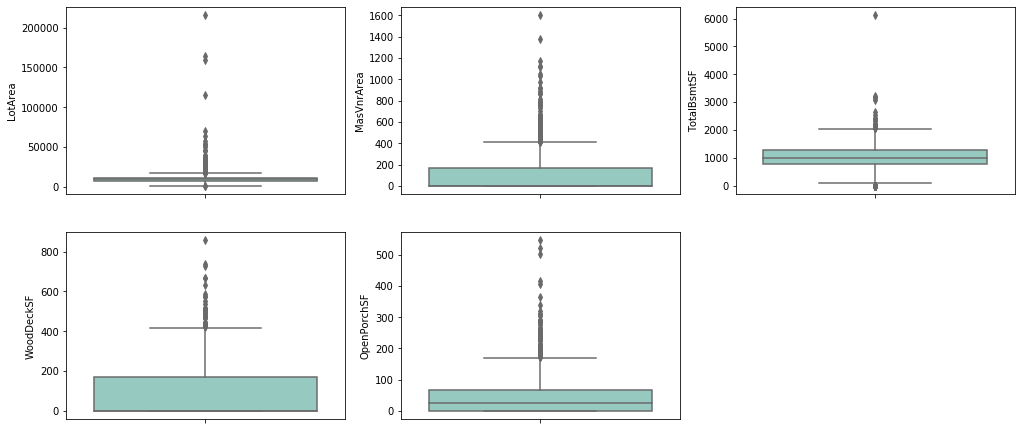

In [19]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house_info)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house_info)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house_info)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house_info)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house_info)
plt.show()

In [20]:
# Removing Outliers

# Removing values beyond 98% for LotArea

numq_LotArea = house_info['LotArea'].quantile(0.98)
house_info = house_info[house_info["LotArea"] < numq_LotArea]

# Removing values beyond 98% for MasVnrArea

numq_MasVnrArea = house_info['MasVnrArea'].quantile(0.98)
house_info = house_info[house_info["MasVnrArea"] < numq_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

numq_TotalBsmtSF = house_info['TotalBsmtSF'].quantile(0.99)
house_info = house_info[house_info["TotalBsmtSF"] < numq_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

numq_WoodDeckSF = house_info['WoodDeckSF'].quantile(0.99)
house_info = house_info[house_info["WoodDeckSF"] < numq_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

numq_OpenPorchSF = house_info['OpenPorchSF'].quantile(0.99)
house_info = house_info[house_info["OpenPorchSF"] < numq_OpenPorchSF]

In [21]:
# Checking the percentage of data retained after outlier treatment

print(round(100*(len(house_info)/1460),2))

93.01


After removing outlier, we have retained 93% of the data.

### Data Visualization

Lets plot some graphs for EDA purpose

<Figure size 1152x576 with 0 Axes>

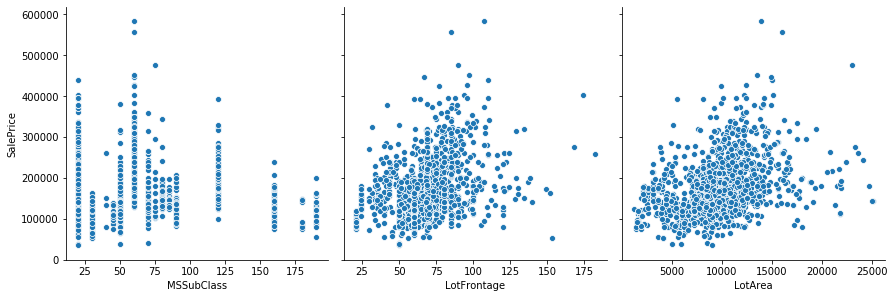

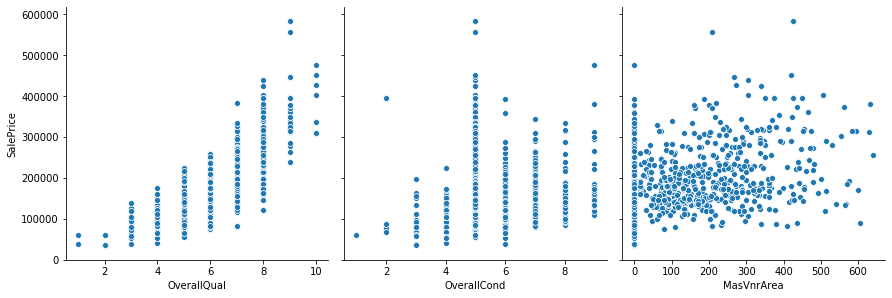

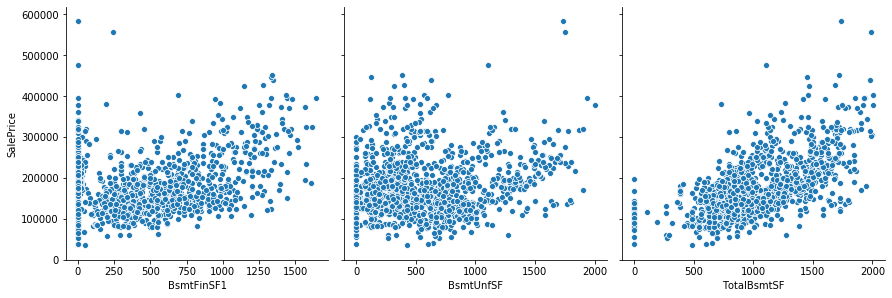

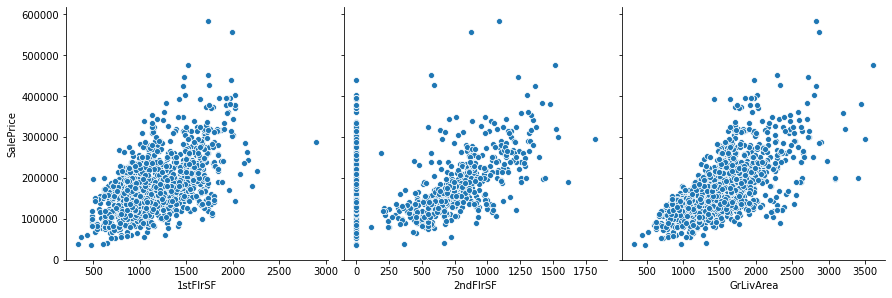

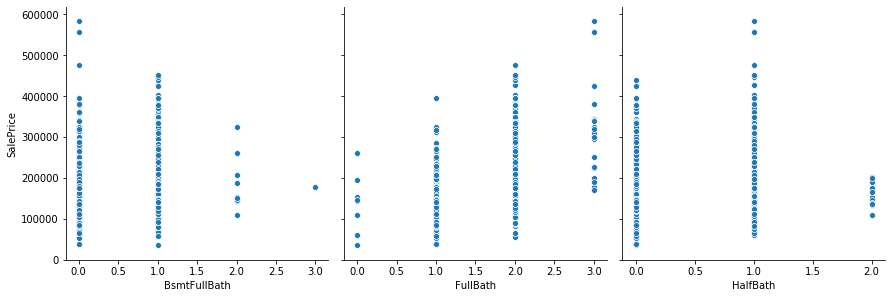

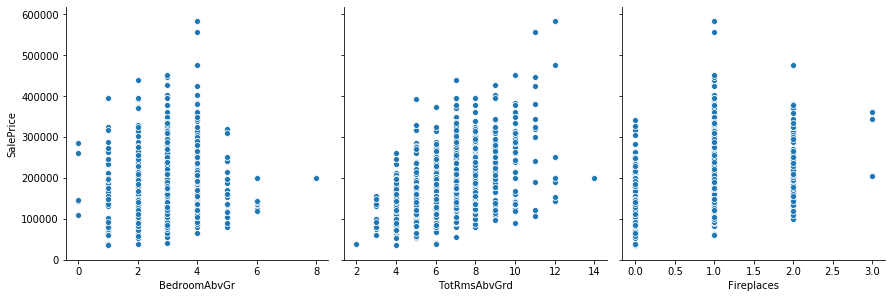

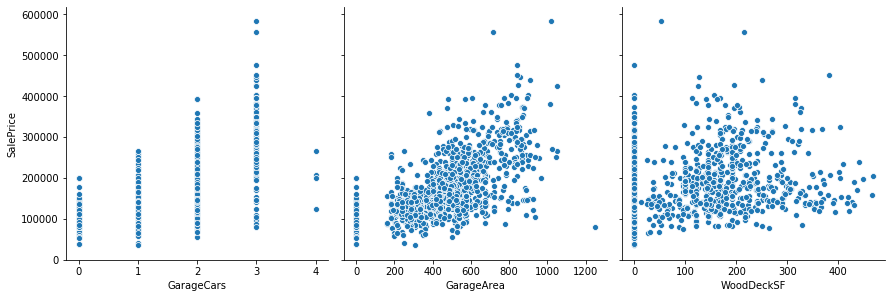

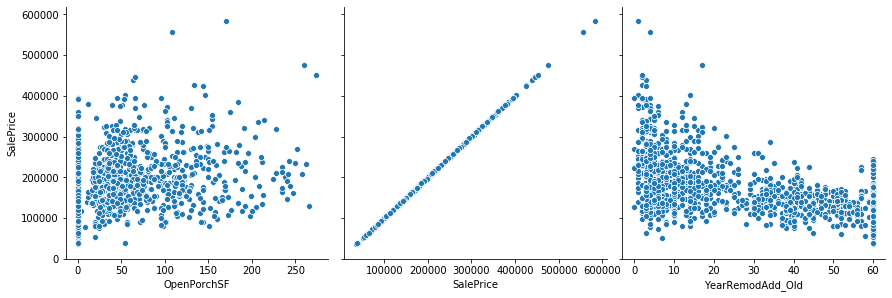

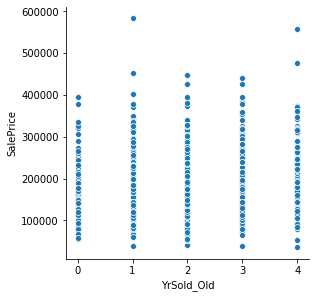

In [22]:
# Check the numerical values using pairplots against target variable.

plt.figure(figsize=(16,8))
sns.pairplot(house_info, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_info, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_info, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_info, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_info, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_info, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_info, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_info, x_vars=['OpenPorchSF','SalePrice', 'YearRemodAdd_Old'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_info, x_vars=['YrSold_Old'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

**Observations** :

- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis

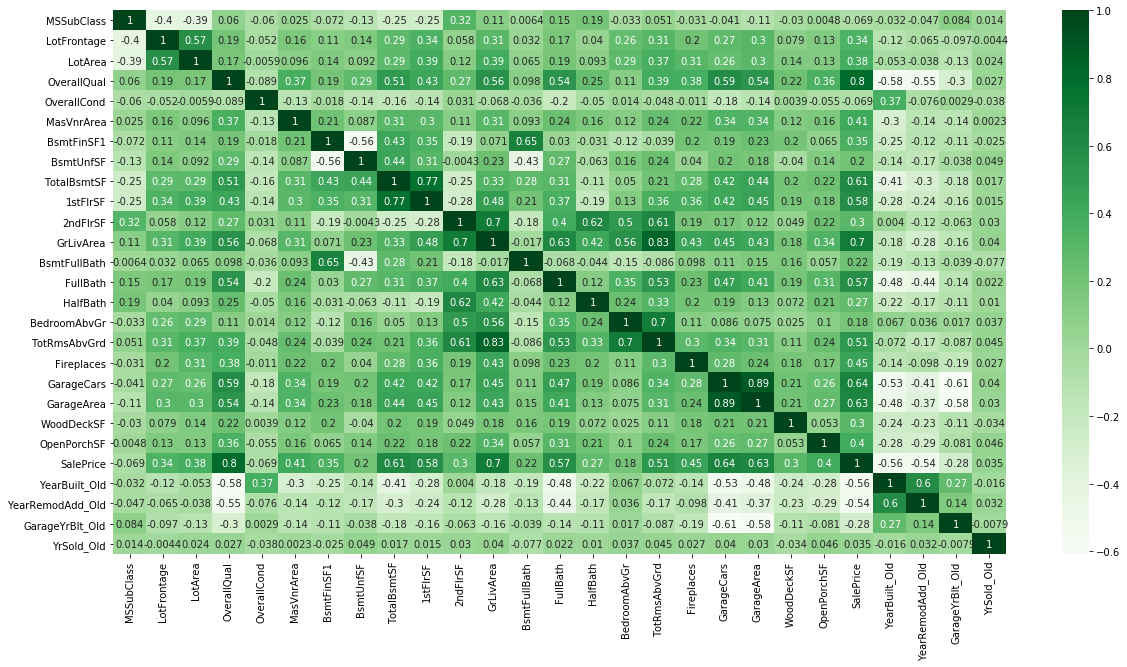

In [23]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(house_info.corr(), annot = True, cmap="Greens")
plt.show()

#### Removing following columns which shows high correlation
    - TotRmsAbvGrd and GrLivArea show 83%
    - Garage Area and Garage Cars show 89%

Hence dropping TotRmsAbvGrd and Garage Cars

In [24]:
# Removing the highly correlated variables

house_info.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

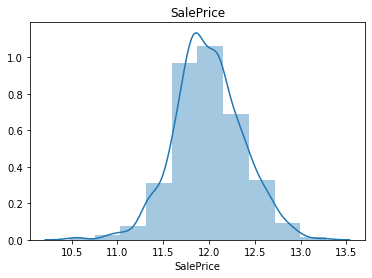

In [25]:
# Visualise the target variable after transformation

house_info['SalePrice'] = np.log1p(house_info['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_info['SalePrice'], bins=10)
plt.show()

In [26]:
# Checking the shape of the dataframe

house_info.shape

(1358, 47)

### Data Preparation

- Converting categorical data into numercal data
- Creating Dummies

Lets check for the below columns here and we can clearly see that these columns are having some kind of order and hence we can say these are ordinal in nature.

In [27]:
house_info[['LotShape','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1',
            'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','BldgType','HouseStyle','Fence',
             'LotConfig','MasVnrType','SaleCondition']].head()

,LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,BldgType,HouseStyle,Fence,LotConfig,MasVnrType,SaleCondition
0,Reg,Gd,Gd,No,GLQ,Ex,Gd,None,RFn,1Fam,2Story,None,Inside,BrkFace,Normal
1,Reg,TA,Gd,Gd,ALQ,Ex,TA,TA,RFn,1Fam,1Story,None,FR2,None,Normal
2,IR1,Gd,Gd,Mn,GLQ,Ex,Gd,TA,RFn,1Fam,2Story,None,Inside,BrkFace,Normal
3,IR1,TA,TA,No,ALQ,Gd,Gd,Gd,Unf,1Fam,2Story,None,Corner,None,Abnorml
4,IR1,Gd,Gd,Av,GLQ,Ex,Gd,TA,RFn,1Fam,2Story,None,FR2,BrkFace,Normal


In [28]:
# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

house_info['d_LotShape'] = house_info['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_info['d_ExterQual'] = house_info['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_info['d_BsmtQual'] = house_info['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_info['d_BsmtExposure'] = house_info['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_info['d_BsmtFinType1'] = house_info['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house_info['d_HeatingQC'] = house_info['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_info['d_KitchenQual'] = house_info['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_info['d_FireplaceQu'] = house_info['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_info['d_GarageFinish'] = house_info['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_info['d_BldgType'] = house_info['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house_info['d_HouseStyle'] = house_info['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_info['d_Fence'] = house_info['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house_info['d_LotConfig'] = house_info['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house_info['d_MasVnrType'] = house_info['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_info['d_SaleCondition'] = house_info['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house_info.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,5,4,3,2,1,4,0,2,1,1


In [29]:
# drop the old columns from which the new columns were derived

house_info = house_info.drop([ 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house_info.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [30]:
# Creating dummy variables
dummy_col = pd.get_dummies(house_info[['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 
                                       'Exterior2nd', 'Foundation', 'GarageType']],drop_first=True)

house_info = pd.concat([house_info,dummy_col],axis='columns')
house_info.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [31]:
# drop the below columns as we now have new columns derived from these columns

house_info = house_info.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 
                              'Exterior2nd', 'Foundation', 'GarageType'], axis=1)

In [32]:
house_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 113 entries, MSSubClass to GarageType_None
dtypes: float64(3), int32(1), int64(36), uint8(73)
memory usage: 526.5 KB


### Scaling and Splitting the data

#### Scaling Features

In [33]:
# Putting all feature variable to X

X = house_info.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [34]:
# Putting response variable to y

y = house_info['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [35]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

#### Split the data into Train and Test

In [36]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### Recursive feature elimination (RFE)

Since there are around 112 features, we will use RFE to get the best 50 features out of the 112 features and use the new features for further analysis.

In [37]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [38]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_scores = rfe_scores.loc[rfe_scores['rfe_support'] == True]
rfe_scores.reset_index(drop=True, inplace=True)

rfe_scores

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,BsmtFullBath,True,1
7,HalfBath,True,1
8,Fireplaces,True,1
9,GarageCars,True,1


In [39]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

# Associate the new 50 columns to X_train and X_test

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### Model Building and Evaluation

#### Ridge Regression

In [40]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [41]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
20,9,-0.076693,-0.081590,1
21,10,-0.076719,-0.081590,2
19,8,-0.076666,-0.081591,3
18,7,-0.076639,-0.081596,4
17,6,-0.076612,-0.081602,5
16,5,-0.076584,-0.081609,6
22,20,-0.076959,-0.081625,7
15,4,-0.076560,-0.081648,8
14,3,-0.076540,-0.081694,9
13,2,-0.076524,-0.081743,10


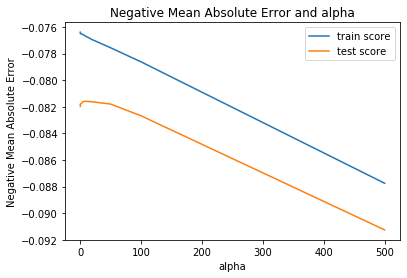

In [42]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [43]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=9.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
# check the coefficient values with lambda = 9

alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02639975,  0.06369097,  0.04842436,  0.02901878,  0.04759614,
        0.11011582,  0.01136481,  0.01485585,  0.02210528,  0.03024864,
        0.00922489, -0.06619073, -0.01178158, -0.01108194,  0.01826405,
        0.01658026,  0.0158298 ,  0.01231578, -0.02341511,  0.01413974,
        0.05606135,  0.01995912,  0.07999781,  0.05941363,  0.02919869,
       -0.00952639, -0.00721232, -0.00973601,  0.00902497,  0.02384756,
       -0.00737339,  0.01922723,  0.00227259, -0.0098266 , -0.00704434,
       -0.0101229 ,  0.01292411, -0.03526684, -0.02823735,  0.00663102,
       -0.00834817, -0.01509477,  0.02558068,  0.01860624,  0.00735477,
        0.02721096,  0.00927173,  0.00695994, -0.00781558,  0.00632606])

In [45]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013528925201451792

In [46]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0264
1,OverallQual,0.0637
2,OverallCond,0.0484
3,BsmtFinSF1,0.0290
4,TotalBsmtSF,0.0476
5,GrLivArea,0.1101
6,BsmtFullBath,0.0114
7,HalfBath,0.0149
8,Fireplaces,0.0221
9,GarageCars,0.0302


In [47]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0264,
 'OverallQual': 0.0637,
 'OverallCond': 0.0484,
 'BsmtFinSF1': 0.029,
 'TotalBsmtSF': 0.0476,
 'GrLivArea': 0.1101,
 'BsmtFullBath': 0.0114,
 'HalfBath': 0.0149,
 'Fireplaces': 0.0221,
 'GarageCars': 0.0302,
 'WoodDeckSF': 0.0092,
 'YearBuilt_Old': -0.0662,
 'YearRemodAdd_Old': -0.0118,
 'GarageYrBlt_Old': -0.0111,
 'd_BsmtExposure': 0.0183,
 'd_HeatingQC': 0.0166,
 'd_KitchenQual': 0.0158,
 'd_GarageFinish': 0.0123,
 'd_BldgType': -0.0234,
 'd_SaleCondition': 0.0141,
 'MSZoning_FV': 0.0561,
 'MSZoning_RH': 0.02,
 'MSZoning_RL': 0.08,
 'MSZoning_RM': 0.0594,
 'Neighborhood_Crawfor': 0.0292,
 'Neighborhood_Edwards': -0.0095,
 'Neighborhood_Gilbert': -0.0072,
 'Neighborhood_MeadowV': -0.0097,
 'Neighborhood_NPkVill': 0.009,
 'Neighborhood_NridgHt': 0.0238,
 'Neighborhood_OldTown': -0.0074,
 'Neighborhood_StoneBr': 0.0192,
 'RoofStyle_Hip': 0.0023,
 'Exterior1st_BrkComm': -0.0098,
 'Exterior1st_CemntBd': -0.007,
 'Exterior1st_Plywood': -0.0101,
 'Exterior1st_Stucco': 0

In [48]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [49]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(13)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1101
11,MSZoning_RL,True,1,0.0800
1,OverallQual,True,1,0.0637
10,MSZoning_FV,True,1,0.0561
2,OverallCond,True,1,0.0484
4,TotalBsmtSF,True,1,0.0476
7,GarageCars,True,1,0.0302
12,Neighborhood_Crawfor,True,1,0.0292
3,BsmtFinSF1,True,1,0.0290
13,Foundation_PConc,True,1,0.0272


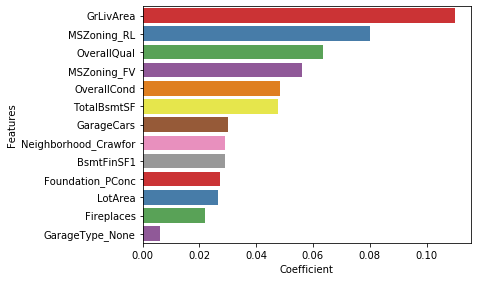

In [50]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 13 variables based on the Ridge Regression model that are significant in predicting the price of a house.

In [51]:
# Checking R-squared value for Ridge
from sklearn.metrics import r2_score

ridge = Ridge(alpha = 9.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9214980376232779
0.9027555644141663


#### Lasso Regression

In [52]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [53]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.076711,-0.081681,1
3,0.0004,-0.076621,-0.081684,2
2,0.0003,-0.076571,-0.081706,3
1,0.0002,-0.076551,-0.081770,4
0,0.0001,-0.076531,-0.081880,5
5,0.001,-0.077177,-0.082008,6
6,0.002,-0.077914,-0.082417,7
7,0.003,-0.078386,-0.082606,8
8,0.004,-0.078805,-0.082880,9
9,0.005,-0.079252,-0.083162,10


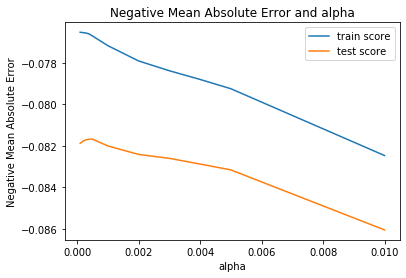

In [54]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [55]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
# check the coefficient values with lambda = 0.0005

alpha = 0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02559798,  0.06407081,  0.04958769,  0.02931234,  0.04753679,
        0.11225167,  0.01081424,  0.01337715,  0.02180814,  0.03016477,
        0.00868358, -0.07021966, -0.01024491, -0.00428869,  0.01793025,
        0.01589765,  0.01541288,  0.01208009, -0.02318778,  0.01403724,
        0.05815759,  0.02042728,  0.0843552 ,  0.06220557,  0.02885729,
       -0.00898166, -0.00652264, -0.00932077,  0.0082758 ,  0.0230344 ,
       -0.00656671,  0.01838821,  0.00201743, -0.00943112, -0.        ,
       -0.0093613 ,  0.01129108, -0.02423675, -0.02500897,  0.        ,
       -0.00756607, -0.01328344,  0.01502597,  0.01561936,  0.00319455,
        0.02280822,  0.00726894,  0.00639093, -0.00709601, -0.        ])

In [57]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013259916906910873

In [58]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0256
1,OverallQual,0.0641
2,OverallCond,0.0496
3,BsmtFinSF1,0.0293
4,TotalBsmtSF,0.0475
5,GrLivArea,0.1123
6,BsmtFullBath,0.0108
7,HalfBath,0.0134
8,Fireplaces,0.0218
9,GarageCars,0.0302


In [59]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.025597975112344167,
 'OverallQual': 0.06407081095653833,
 'OverallCond': 0.04958768874998819,
 'BsmtFinSF1': 0.02931234258378215,
 'TotalBsmtSF': 0.04753679327513786,
 'GrLivArea': 0.11225166729783224,
 'BsmtFullBath': 0.01081423574209938,
 'HalfBath': 0.01337715114060038,
 'Fireplaces': 0.02180813860379241,
 'GarageCars': 0.030164770021745134,
 'WoodDeckSF': 0.008683580007169452,
 'YearBuilt_Old': -0.07021966494464597,
 'YearRemodAdd_Old': -0.01024491439173454,
 'GarageYrBlt_Old': -0.004288686203387191,
 'd_BsmtExposure': 0.017930250233916336,
 'd_HeatingQC': 0.015897654744140295,
 'd_KitchenQual': 0.015412876476435761,
 'd_GarageFinish': 0.012080092157827887,
 'd_BldgType': -0.023187779542865463,
 'd_SaleCondition': 0.014037239975385796,
 'MSZoning_FV': 0.05815758772936605,
 'MSZoning_RH': 0.020427278570433742,
 'MSZoning_RL': 0.0843551972483033,
 'MSZoning_RM': 0.06220556883702339,
 'Neighborhood_Crawfor': 0.02885729027292886,
 'Neighborhood_Edwards': -0.00898166322817

In [60]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [61]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(13)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.112252
11,MSZoning_RL,True,1,0.084355
1,OverallQual,True,1,0.064071
12,MSZoning_RM,True,1,0.062206
9,MSZoning_FV,True,1,0.058158
2,OverallCond,True,1,0.049588
4,TotalBsmtSF,True,1,0.047537
7,GarageCars,True,1,0.030165
3,BsmtFinSF1,True,1,0.029312
13,Neighborhood_Crawfor,True,1,0.028857


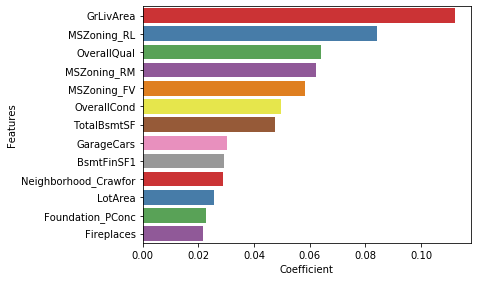

In [62]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 13 variables based on the Lasso Regression model that are significant in predicting the price of a house.

In [63]:
# Checking R-squared for Lasso
lasso = Lasso(alpha = 0.0005)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9213129785798648
0.9046891666317122


## Conclusion :

- The **optimal lambda value** in case of Ridge and Lasso is as below:
    - Ridge - 9
    - Lasso - 0.0005
    
- The **Mean Squared error** in case of Ridge and Lasso are:
    - Ridge - 0.0135289
    - Lasso - 0.0132599

- The Mean Squared Error of Lasso is slightly lower than that of Ridge

- After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them.

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.
  
Hence based on Lasso, the factors that generally affect the price are the 
- Zoning classification**(MSZoning)**
- Living area square feet**(GrLivArea)**
- Overall material and finish of the house**(OverallQual)**
- Overall condition of the house**(OverallCond)**
- Total square feet of basement area**(TotalBsmtSF)**
- Size of garage in car capacity**(GarageCars)**
    
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.